In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split



In [2]:
churn_df = pd.read_csv("/data/telecom_churn_clean.csv")

In [3]:
churn_df.columns

Index(['Unnamed: 0', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'churn'],
      dtype='object')

In [4]:
X = churn_df[['total_day_charge','total_eve_minutes']].values
y = churn_df['churn'].values 

In [5]:
print(X.shape, y.shape)

(3333, 2) (3333,)


In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,
                                                 random_state=21, stratify=y)

In [7]:
# Check the shapes
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Check original data
print(f"Original X shape: {X.shape}")
print(f"Original y shape: {y.shape}")

X_train shape: (2333, 2)
y_train shape: (2333,)
X_test shape: (1000, 2)
y_test shape: (1000,)
Original X shape: (3333, 2)
Original y shape: (3333,)


In [8]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)

,n_neighbors,6
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [9]:
print(knn.score(X_test,y_test))

0.876


In [12]:
train_accuracies = {}
test_accuracies = {}
neighbours = np.arange(1,26)

for n in neighbours:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    train_accuracies[n] = knn.score(X_train,y_train)
    test_accuracies[n] = knn.score(X_test,y_test)

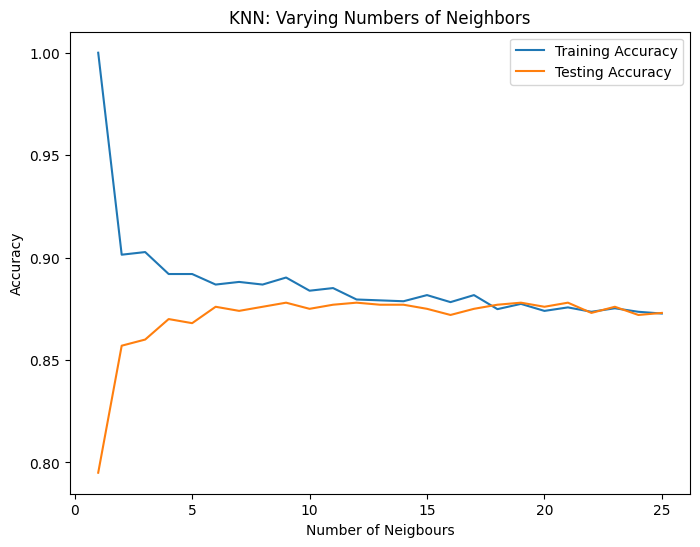

In [14]:
plt.figure(figsize=(8,6))
plt.title("KNN: Varying Numbers of Neighbors")
plt.plot(neighbours,train_accuracies.values(),label='Training Accuracy')
plt.plot(neighbours,test_accuracies.values(),label='Testing Accuracy')
plt.legend()
plt.xlabel("Number of Neigbours")
plt.ylabel("Accuracy")
plt.show()


In [15]:
import plotly.graph_objects as go

In [16]:
fig = go.Figure()

# Training accuracy
fig.add_trace(go.Scatter(
    x=neighbours,
    y=list(train_accuracies.values()),
    mode='lines+markers',
    name='Training Accuracy'
))

# Testing accuracy
fig.add_trace(go.Scatter(
    x=neighbours,
    y=list(test_accuracies.values()),
    mode='lines+markers',
    name='Testing Accuracy'
))

# Layout
fig.update_layout(
    title="KNN: Varying Numbers of Neighbors",
    xaxis_title="Number of Neighbors",
    yaxis_title="Accuracy",
    template="plotly_white",
    width=800,
    height=600
)

fig.show()

In [17]:
import altair as alt

In [18]:
# Convert into a DataFrame for Altair
df = pd.DataFrame({
    "Neighbors": list(train_accuracies.keys()) + list(test_accuracies.keys()),
    "Accuracy": list(train_accuracies.values()) + list(test_accuracies.values()),
    "Type": ["Training"] * len(train_accuracies) + ["Testing"] * len(test_accuracies)
})

# Build the interactive line chart
chart = alt.Chart(df).mark_line(point=True).encode(
    x=alt.X("Neighbors:O", title="Number of Neighbors"),  # ordinal axis
    y=alt.Y("Accuracy:Q", title="Accuracy"),
    color="Type:N",  # separate lines for Training vs Testing
    tooltip=["Neighbors", "Accuracy", "Type"]
).properties(
    title="KNN: Varying Numbers of Neighbors",
    width=600,
    height=400
)

chart.interactive()


/opt/conda/lib/python3.11/site-packages/altair/utils/core.py:384: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.



alt.Chart(...)